In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from google.colab import files

uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [9]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")

print("Rows:", df.shape[0], " Columns:", df.shape[1])
df.head()

Rows: 8807  Columns: 12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# Dataset Overview

# 1. General info about the dataset
df.info()

# 2. Quick summary of numerical columns (like duration if numeric)
print("\nSummary statistics:")
print(df.describe(include="all").T.head(10))  # show first 10 rows for readability

# 3. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Summary statistics:
               count unique                 top  freq         mean       std  \
show_id         8807   8807               s8807     1          NaN       NaN   
type            8807      2               Movie  6131          NaN     

## Visualization 1: Movies vs TV Shows
We start by checking the overall split between Movies and TV Shows on Netflix.
This gives us a high-level idea about what type of content dominates the platform.

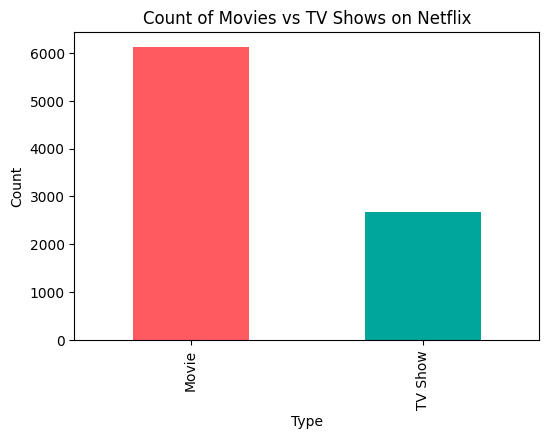

In [11]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color=['#FF5A5F', '#00A699'])

plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## Visualization 2: Content Growth Over the Years
Next, we analyze how many Movies and TV Shows were added to Netflix each year.
This helps us understand the growth trend of the platform over time.

/tmp/ipython-input-6807337.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


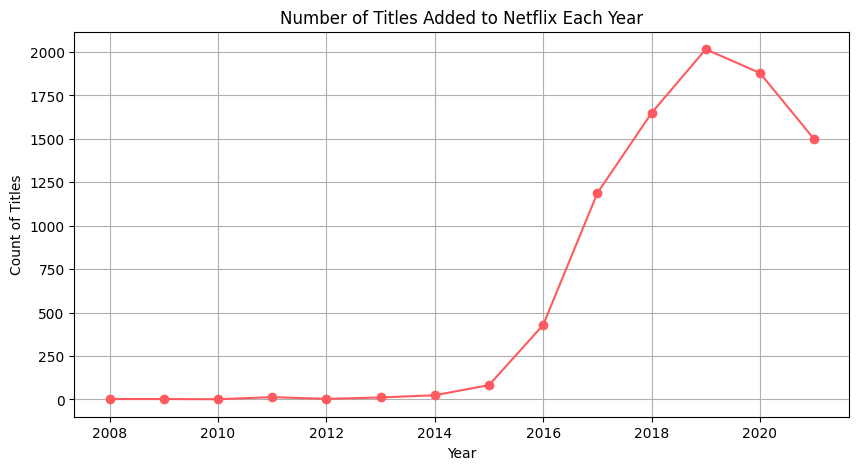

In [12]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count number of titles added per year
titles_per_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
titles_per_year.plot(kind='line', marker='o', color='#FF5A5F')

plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.grid(True)
plt.show()

## Visualization 3: Movies vs TV Shows Added Over the Years
We now break down the yearly growth by content type (Movies vs TV Shows).
This helps us see whether Netflix has been focusing more on films or series in recent years.

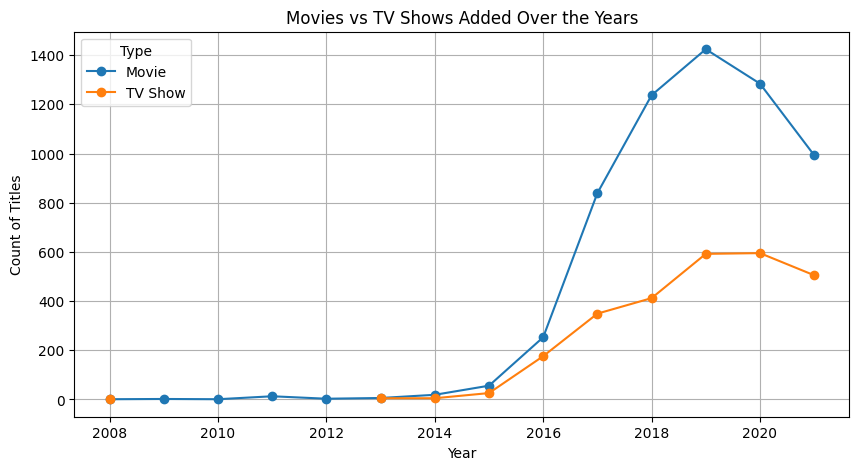

In [13]:
# Group by year and type
content_trend = df.groupby(['year_added', 'type']).size().unstack()

# Plot
content_trend.plot(kind='line', marker='o', figsize=(10,5))

plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.legend(title="Type")
plt.grid(True)
plt.show()

## Visualization 4: Top 10 Countries Producing Netflix Content
Next, we check which countries contribute the most content to Netflix.
This shows the global spread of Netflix's library.

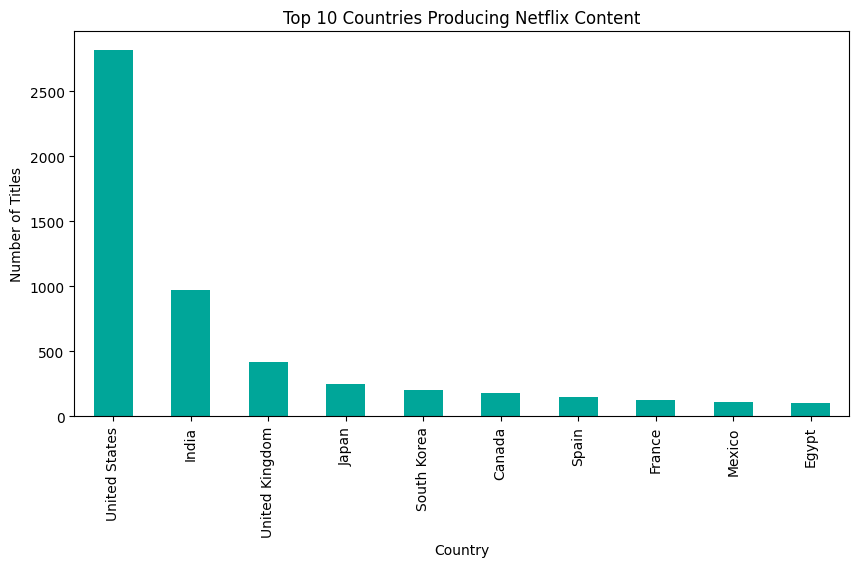

In [14]:
# Count the number of titles by country
top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='#00A699')

plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

## Visualization 5: Popular Genres on Netflix
Netflix classifies each title under one or more genres (like Drama, Comedy, Action, etc.).
We will analyze which genres dominate the platform to understand audience preferences.

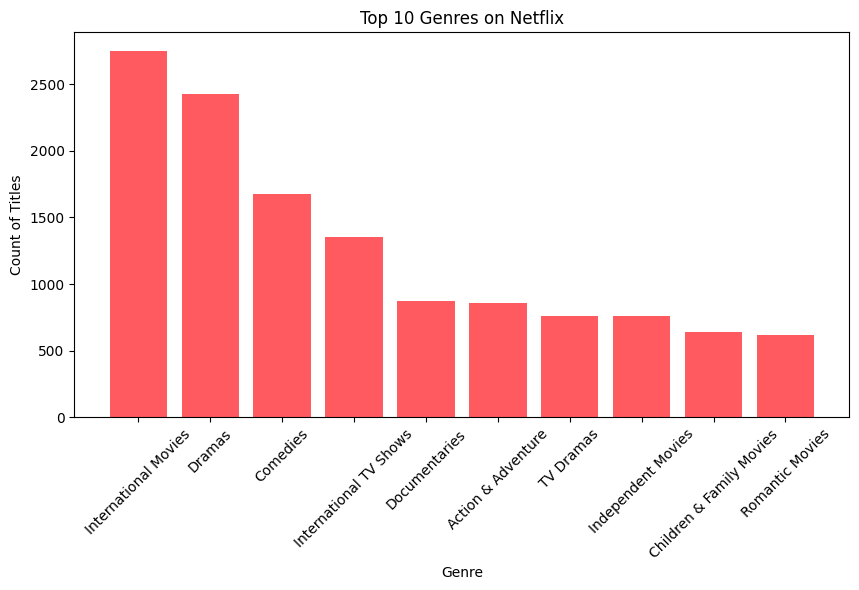

In [15]:
# Split the 'listed_in' column (genres) and count frequencies
from collections import Counter

genre_list = df['listed_in'].dropna().apply(lambda x: x.split(','))
all_genres = [g.strip() for sublist in genre_list for g in sublist]

# Count top 10 genres
top_genres = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,5))
plt.bar(genre_df['Genre'], genre_df['Count'], color='#FF5A5F')

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count of Titles")
plt.xticks(rotation=45)
plt.show()

## Visualization 6: Distribution of Ratings
Netflix titles come with ratings like TV-MA, TV-14, PG, R, etc.
Analyzing their distribution helps us understand the target audience for Netflix content.

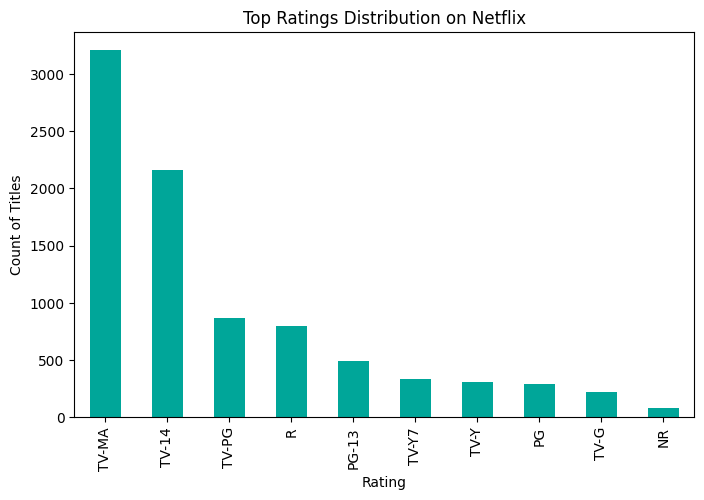

In [16]:
# Count rating distribution
rating_counts = df['rating'].value_counts().head(10)

# Plot
plt.figure(figsize=(8,5))
rating_counts.plot(kind='bar', color='#00A699')

plt.title("Top Ratings Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count of Titles")
plt.show()

## Visualization 7: Analysis of Duration
Netflix content comes with a `duration` column. For Movies, it shows minutes (e.g., "90 min"),
while for TV Shows, it shows the number of seasons (e.g., "2 Seasons").
We will analyze these separately to understand typical movie lengths and season counts.

/tmp/ipython-input-3536453008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(float)


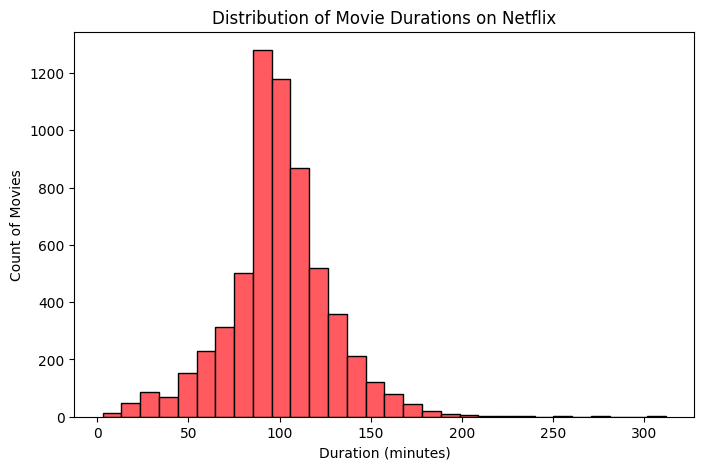

/tmp/ipython-input-3536453008.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s','').astype(int)


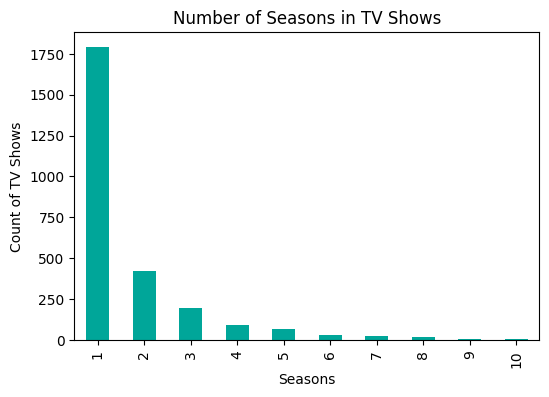

In [17]:
# Separate Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# --- Movies: convert duration to numeric (minutes) ---
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(8,5))
plt.hist(movies['duration_min'].dropna(), bins=30, color='#FF5A5F', edgecolor='black')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count of Movies")
plt.show()

# --- TV Shows: count seasons ---
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s','').astype(int)

plt.figure(figsize=(6,4))
tv_shows['seasons'].value_counts().head(10).plot(kind='bar', color='#00A699')
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count of TV Shows")
plt.show()

# Conclusion & Key Insights

From our Exploratory Data Analysis (EDA) on the Netflix dataset, we observed the following:

1. **Movies dominate Netflix's library** compared to TV Shows.  
2. **Content addition grew rapidly after 2015**, peaking around 2019–2020.  
3. **The United States leads by far** in content production, followed by India and the UK.  
4. **Drama, International Movies, and Comedy** are among the most popular genres.  
5. **Ratings are skewed towards adult audiences (TV-MA, TV-14)**, showing that Netflix caters mainly to mature viewers.  
6. **Movies typically range between 90–120 minutes**, while most TV Shows have **just 1 season** (suggesting many limited series).  

---

### Final Note:
This project demonstrated skills in:
- **Python (Pandas, NumPy, Matplotlib)**  
- **Data Cleaning & Handling Missing Values**  
- **Exploratory Data Analysis (EDA)**  
- **Data Visualization**  

Such analysis can be extended further into recommendations, trend forecasting, or clustering genres/countries.